In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR

#### Question 2

In [2]:
data = [
    19261231,	0.09601756,	  0.05390,	0.1111,	        0.03602639,	  -0.0111735,
    19271231,	0.3334804,	  0.04940,	0.16477461,  	0.03091679,	  -0.02259799,
    19281231,	0.3888378,	  0.04001,	0.081501646,	0.04442713,	  -0.01156061,
    19291231,	-0.1463891,	  0.03841,	-0.210787397,	0.04921938,	  0.005848194,
    19301231,	-0.2859793,	  0.04839,	-0.14202521,	0.02748688,	  -0.06395326,
    19311231,	-0.4448072,	  0.06218,	-0.328347732,	0.007070178,  -0.09316816,
    19321231,	-0.09397303,  0.07099,	-0.034156287,	0.00871276,	  -0.1027394,
    19331230,	0.5772589,	  0.04246,	-0.095155225,	0.004654573,  0.007634499,
    19341231,	0.0422714,	  0.04190,	-0.012749405,	0.003301286,  0.01515195,
    19351231,	0.4467053,	  0.04213,	0.395873314,	0.001619166,  0.02985027,
    19361231,	0.3255401,	  0.04479,	0.348694097,	0.001859548,  0.01449224,
    19371231,	-0.3461814,	  0.05623,	-0.222822419,	0.004441552,  0.02857097,
    19381231,	0.2817368,	  0.04420,	-0.035216194,	0.000435816,  -0.02777739,
    19391230,	0.01958817,	  0.04896,	0.076669975,	0.000172997,  1.74832E-07,
    19401231,	-0.07438378,  0.06003,	0.070791228,	0.000191998,  0.007142955,
    19411231,	-0.09632794,  0.07230,	0.014914034,	-0.006809899, 0.0992902,
    19421231,	0.1611348,	  0.07036,	0.055732433,	0.003953114,  0.09032108,
    19431231,	0.2819062,	  0.05252,	-0.090977518,	0.004072581,  0.02958535,
    19441230,	0.2140857,	  0.05095,	0.120779207,	0.003977231,  0.02298856,
    19451231,	0.3842218,	  0.04151,	0.082850299,	0.003996299,  0.02247189,
    19461231,	-0.05922491,  0.04234,	-0.079358399,	0.003821676,  0.1813189,
    19471231,	0.03377377,	  0.05726,	0.322321802,	0.005703625,  0.0883728,
    19481231,	0.02324643,	  0.06492,	0.089303589,	0.008593666,  0.02991434,
    19491231,	0.2025142,	  0.07114,	0.23031737,  	0.01140819,	  -0.0207452,
    19501230,	0.2985539,	  0.07179,	0.22261,    	0.01200345,	  0.05932176,
    19511231,	0.2086977,	  0.05845,	-0.070244715,	0.01568127,	  0.06000007,
    19521231,	0.133165,	  0.05534,	0.016584203,	0.01907213,	  0.007547012,
    19531231,	0.003251946,  0.05700,	-0.022444418,	0.02221339,	  0.007489941,
    19541231,	0.502619,	  0.04929,	0.238396629,	0.01127904,	  -0.007434001,
    19551230,	0.2529811,	  0.04177,	0.019217203,	0.0159763,	  0.003745132,
    19561231,	0.08478169,	  0.04031,	0.006331201,	0.02777914,	  0.02984917,
    19571231,	-0.103713,	  0.04339,	-0.075251033,	0.03751551,	  0.0289844,
    19581231,	0.4483238,	  0.03960,	0.271361152,	0.02053367,	  0.01760529,
    19591231,	0.1254279,	  0.03287,	-0.095637625,	0.03586614,   0.01730057,
    19601230,	0.0116649,	  0.03476,	0.034113846,	0.03843152,	  0.01360589,
    19611229,	0.2698882,	  0.03016,	0.069490304,	0.02520688,	  0.006710853,
    19621231,	-0.1029504,	  0.03435,	-0.012396745,	0.0294147,	  0.01333214,
    19631231,	0.2088682,	  0.03235,	0.102847145,	0.03256685,	  0.01644715,
    19641231,	0.1630413,	  0.03061,	0.067939026,	0.03769872,	  0.009708883,
    19651231,	0.1438625,	  0.03056,	0.108049402,	0.04069634,	  0.0192312,
    19661230,	-0.0868905,	  0.03389,	-0.020602508,	0.05204305,	  0.0345909,
    19671229,	0.2856647,	  0.03079,	0.13331256,	    0.04743744,	  0.0303949,
    19681231,	0.1416968,	  0.02928,	0.054789688,	0.05549706,	  0.047198,
    19691231,	-0.1083622,	  0.03093,	-0.086482406,	0.06977187,	  0.06197254,
    19701231,	0.000726434,  0.03602,	0.124929083,	0.07825667,	  0.05570253,
    19711231,	0.1619893,	  0.03000,	-0.060452466,	0.04940884,	  0.03266379,
    19721229,	0.1734055,	  0.02700,	0.028235332,	0.0421164,	  0.03406292,
    19731231,	-0.1876772,	  0.03077,	-0.101670822,	0.07153693,	  0.08705888,
    19741231,	-0.2793331,	  0.04526,	0.013971261,	0.08511717,	  0.1233764,
    19751231,	0.3734586,	  0.04203,	0.223991265,	0.06864705,	  0.06936672,
    19761231,	0.2677072,	  0.03981,	0.154904282,	0.05675786,	  0.04864824,
    19771230,	-0.02976601,  0.04662,	0.08561823,	    0.0541378,	  0.06700864,
    19781229,	0.08544849,	  0.05087,	0.127030961,	0.07361196,	  0.0901778,
    19791231,	0.2440917,	  0.05176,	0.203497805,	0.1060246,	  0.13294,
    19801231,	0.3323356,    0.04808,	0.18081333,	    0.1254744,	  0.1251638,
    19811231,	-0.03983898,  0.04768,	-0.0911247,	    0.1646045,	  0.08922518,
    19821231,	0.2042357,	  0.05406,	0.295395442,	0.1319853,	  0.03829644,
    19831230,	0.2264873,	  0.04040,	-0.119105041,	0.09331747,	  0.03790795,
    19841231,	0.03163135,	  0.04361,	0.066982461,	0.1111535,	  0.03948573,
    19851231,	0.314114,	  0.03914,	0.135065083,	0.08526557,	  0.03798603,
    19861231,	0.1556905,	  0.03491,	-0.003929068,	0.06749897,	  0.01097894,
    19871231,	0.01823941,	  0.03233,	-0.086669567,	0.06639628,	  0.04434297,
    19881230,	0.1755366,	  0.04051,	0.415743256,	0.06860631,	  0.04419404,
    19891229,	0.284321,	  0.03552,	0.08753082,	    0.09031137,	  0.04647289,
    19901231,	-0.06083272,  0.03651,	-0.068580893,	0.08437825,	  0.06106264,
    19911231,	0.3364372,	  0.03093,	0.098239935,	0.06385352,	  0.03064377,
    19921231,	0.09061833,	  0.02778,	-0.047051263,	0.03916584,	  0.02900818,
    19931231,	0.1158514,	  0.02565,	0.0043701,	    0.03248026,	  0.02748402,
    19941230,	-0.007571814, 0.02612,	-0.015001408,	0.04277545,	  0.02674871,
    19951229,	0.356708,	  0.02389,	0.212003678,	0.060922,	  0.02538396,
    19961231,	0.2116425,	  0.02031,	0.009774068,	0.05414527,	  0.03322544,
    19971231,	0.3034825,	  0.01690,	0.066406719,	0.05494309,	  0.01702488,
    19981231,	0.2230387,	  0.01460,	0.04112008,	    0.05302643,	  0.01611878,
    19991231,	0.2526398,	  0.01310,	0.109913936,	0.04922662,	  0.02684785,
    20001229,	-0.1104001,	  0.01112,	-0.253392651,	0.06152166,	  0.03386863,
    20011231,	-0.1126899,	  0.01340,	0.054833128,	0.04480916,	  0.01551723,
    20021231,	-0.2084581,	  0.01629,	-0.053110705,	0.01795093,	  0.0237689,
    20031231,	0.3314703,    0.01802,	0.446860987,	0.01160402,	  0.01879396,
    20041231,	0.1300591,	  0.01942,	0.194804567,	0.01307985,	  0.032555616]

data = np.array(data).reshape((-1, 6))
df = pd.DataFrame(data, columns=['date', 'hpr', 'dp', 'dg', 'tbill', 'infl'])
df['date'] = pd.to_datetime(df.date.astype(int).astype(str))
df.set_index('date', inplace=True)

In [3]:
T = len(df)                          # length of sample period
divgr = df.dg                        # ex-post nominal growth rate of annual dividends
R = df.hpr                           # ex-post nominal value-weighted market return
Rf = df.tbill                        # ex-post nominal 90-day T-bill return
DP = df.dp                           # current dividend to price ratio

dp = np.log(DP[1:])                  # log dividend yield
dplag = np.log(DP.shift(1).dropna()) # 1-period lagged log dividend yield
Dd = np.log(1 + divgr[1:])           # dividend growth (log difference)
r = np.log(1 + R[1:])                # log return
rexc = np.log(1 + R[1:] - Rf[1:])    # log excess return

In [4]:
# Report summary statistics.
for i, d in enumerate([dp, dplag, Dd, r, rexc]):
    mean = np.mean(d)
    stddev = np.std(d, ddof=1)
    min_val = np.min(d)
    q10 = np.quantile(d, q=0.1)
    q25 = np.quantile(d, q=0.25)
    q50 = np.quantile(d, q=0.50)
    q75 = np.quantile(d, q=0.75)
    q90 = np.quantile(d, q=0.9)
    max_val = np.max(d)
    print(f'[{i+1}] mean = {mean:.4f}, stddev = {stddev:.4f}, min = {min_val:.4f}, q10 = {q10:.4f}, q25 = {q25:.4f}, med = {q50:.4f}, q75 = {q75:.4f}, q90 = {q90:.4f}, max = {max_val:.4f}')

[1] mean = -3.2851, stddev = 0.4162, min = -4.4990, q10 = -3.9101, q25 = -3.4811, med = -3.2100, q75 = -3.0117, q90 = -2.8316, max = -2.6269
[2] mean = -3.2720, stddev = 0.4113, min = -4.4990, q10 = -3.7830, q25 = -3.4794, med = -3.2076, q75 = -3.0084, q90 = -2.8316, max = -2.6269
[3] mean = 0.0432, stddev = 0.1420, min = -0.3980, q10 = -0.1002, q25 = -0.0451, med = 0.0534, q75 = 0.1191, q90 = 0.2092, max = 0.3694
[4] mean = 0.0957, stddev = 0.1977, min = -0.5884, q10 = -0.1178, q25 = -0.0246, med = 0.1396, q75 = 0.2459, q90 = 0.2945, max = 0.4557
[5] mean = 0.0561, stddev = 0.2070, min = -0.6013, q10 = -0.2026, q25 = -0.0799, med = 0.0999, q75 = 0.2024, q90 = 0.2695, max = 0.4527


In [5]:
Hs = [1, 2, 3, 5, 10]

In [6]:
rexc

date
1927-12-31    0.264334
1928-12-31    0.295956
1929-12-31   -0.217669
1930-12-31   -0.376100
1931-12-31   -0.601256
                ...   
2000-12-29   -0.188648
2001-12-31   -0.171381
2002-12-31   -0.256712
2003-12-31    0.277530
2004-12-31    0.110628
Length: 78, dtype: float64

In [7]:
for H in Hs:
    y_re = rexc.rename('rexc').rolling(H).sum().shift(-(H-1))
    y_dg = Dd.rename('dg').rolling(H).sum().shift(-(H-1))
    X = sm.add_constant(dplag).loc[y_re.index, :]

    ols_re = sm.OLS(y_re, X, missing='drop').fit()
    ols_dg = sm.OLS(y_dg, X, missing='drop').fit()

    newey_re = ols_re.get_robustcov_results(cov_type='HAC', maxlags=1)
    newey_dg = ols_dg.get_robustcov_results(cov_type='HAC', maxlags=1)

    print(f'===== Regression result for H = {H} =====')
    print(f'[1] const: {ols_re.params['const']:.5f} ({ols_re.bse['const']:.5f})')
    print(f'    dp:    {ols_re.params['dp']:.5f} ({ols_re.bse['dp']:.5f})')
    print(f'    R2:    {ols_re.rsquared:.5f}')
    print(f'    NW:    {newey_re.bse[1]:.5f}')
    print(f'[2] const: {ols_dg.params['const']:.5f} ({ols_dg.bse['const']:.5f})')
    print(f'    dp:    {ols_dg.params['dp']:.5f} ({ols_dg.bse['dp']:.5f})')
    print(f'    R2:    {ols_dg.rsquared:.5f}')
    print(f'    NW:    {newey_dg.bse[1]:.5f}')
    print()

===== Regression result for H = 1 =====
[1] const: 0.42461 (0.18557)
    dp:    0.11264 (0.05628)
    R2:    0.05007
    NW:    0.05516
[2] const: 0.05965 (0.13057)
    dp:    0.00504 (0.03960)
    R2:    0.00021
    NW:    0.04129

===== Regression result for H = 2 =====
[1] const: 0.82106 (0.27527)
    dp:    0.21836 (0.08374)
    R2:    0.08312
    NW:    0.09045
[2] const: 0.06876 (0.18820)
    dp:    -0.00441 (0.05725)
    R2:    0.00008
    NW:    0.07199

===== Regression result for H = 3 =====
[1] const: 1.19653 (0.32395)
    dp:    0.32031 (0.09892)
    R2:    0.12409
    NW:    0.10574
[2] const: 0.15105 (0.23440)
    dp:    0.01008 (0.07158)
    R2:    0.00027
    NW:    0.08114

===== Regression result for H = 5 =====
[1] const: 1.84901 (0.43073)
    dp:    0.48973 (0.13300)
    R2:    0.15848
    NW:    0.14332
[2] const: 0.41831 (0.33069)
    dp:    0.06760 (0.10211)
    R2:    0.00605
    NW:    0.07448

===== Regression result for H = 10 =====
[1] const: 4.48498 (0.5926

In [8]:
newey_re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rexc   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     28.92
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.03e-06
Time:                        12:16:32   Log-Likelihood:                -36.655
No. Observations:                  69   AIC:                             77.31
Df Residuals:                      67   BIC:                             81.78
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4850      0.698      6.423      0.000       3.091       5.879
dp             1.2216      0.227      5.378      0.000       0.768       1.675
==============================================================================
Omnibus:                        0.707   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.705
Skew:                          -0.230   Prob(JB):                        0.703
Kurtosis:                       2.817   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

#### Question 3

In [9]:
df1 = pd.read_csv('../data/PS4Q3.txt', sep='\t')
df1['Date'] = pd.to_datetime(df1['Date'].astype(str), format='%Y%m')
df1.set_index('Date', inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 1928-12-01 to 2001-12-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_Me    293 non-null    float64
 1   TY      293 non-null    float64
 2   PE      293 non-null    float64
 3   VS      293 non-null    float64
dtypes: float64(4)
memory usage: 11.4 KB


In [11]:
df1.describe()

,R_Me,TY,PE,VS
count,293.000000,293.000000,293.000000,293.000000
mean,0.013324,0.622389,2.867626,1.661126
std,0.109659,0.642368,0.376043,0.374644
min,-0.446900,-1.320000,1.500600,1.216000
25%,-0.034700,0.210000,2.617700,1.410100
50%,0.029300,0.530000,2.848700,1.525000
75%,0.070900,0.960000,3.098300,1.749100
max,0.636000,2.720000,3.890600,2.713400


In [12]:
I = np.eye(4) # 4 x 4
e = np.zeros((1, 4)) # 1 x 4
e[0, 0] = 1

print(e)

[[1. 0. 0. 0.]]


In [13]:
model = VAR(df1, freq='QS-DEC').fit(maxlags=1)

In [14]:
Γ = model.params.iloc[1:].values # 4 x 4

In [15]:
u = model.resid.values.T # 4 x T

In [16]:
dp_bar = df.loc['1928':'2001'].dp.mean()
ρ = np.exp(dp_bar) / (1 + np.exp(dp_bar))
print(ρ)

0.510296382032857


In [18]:
λ = ρ * Γ @ np.linalg.inv(I - ρ * Γ)

In [19]:
N_CF = (e @ I.T + (e @ I.T) @ λ) @ u
N_DR = ((e @ I.T) @ λ) @ u 

In [20]:
print(N_CF.shape)
print(N_DR.shape)

(1, 292)
(1, 292)


In [21]:
N_CF

array([[ 4.91542939e-02,  5.69135043e-02,  1.06324972e-01,
        -2.94225666e-01,  1.23586995e-01, -1.62477817e-01,
        -7.59159240e-02, -1.84043718e-01,  8.85686441e-02,
        -9.70501279e-02, -3.97397237e-01, -2.64573174e-01,
        -1.35700733e-01, -4.17158581e-01,  4.42772971e-01,
        -1.41390917e-01, -2.12628541e-01,  6.03760198e-01,
        -7.31983237e-02, -1.35586999e-02,  8.24210480e-02,
        -4.84033203e-02, -8.83087329e-02,  4.67262818e-02,
        -7.75903172e-02,  1.47043524e-01,  1.03612648e-01,
         1.55522138e-01,  9.84839164e-02,  4.29290862e-04,
         8.81595425e-02,  1.04615043e-01,  3.38127550e-02,
        -1.03937247e-01, -1.01870687e-01, -2.19254540e-01,
        -2.12531737e-01,  2.83257867e-01,  4.67396244e-02,
         9.91659780e-02, -1.41070105e-01, -1.71249860e-02,
         1.56904255e-01,  1.51542164e-02,  5.25166680e-03,
        -2.07429558e-01,  6.57952916e-02,  2.73624558e-03,
        -5.58124981e-02, -1.64592648e-02,  2.36811962e-0

In [22]:
N_DR

array([[-1.90327058e-02, -2.22107652e-02, -1.31229501e-03,
         1.24190064e-03, -1.68546632e-02,  2.15789648e-02,
         1.05319578e-02,  3.18885831e-03,  3.56432336e-03,
         1.68044135e-02,  3.62043326e-02, -4.72736193e-02,
        -2.95911596e-02,  4.96526397e-02, -3.49110565e-02,
         1.92257627e-02, -4.51044815e-02,  8.25498627e-03,
         1.39594995e-02, -1.78810799e-02, -1.13452165e-02,
         2.75499506e-02, -2.41696817e-04,  8.52705336e-03,
         2.54571185e-02,  4.66246021e-03, -5.93292387e-03,
        -2.09977604e-03, -1.09809579e-03,  7.30262446e-03,
         3.47394339e-03, -5.15691025e-03, -1.54236240e-02,
         1.52453039e-02,  9.40940732e-03,  1.11063948e-02,
         1.98485494e-02,  5.58919641e-03,  4.86729611e-03,
         1.43047612e-02,  1.80437652e-02, -8.95581279e-03,
        -4.60013274e-03,  2.85886529e-02,  7.04489587e-03,
        -1.74988181e-02,  1.71103138e-02, -6.28178755e-03,
         1.09098623e-03, -1.14621579e-02, -6.38468754e-0

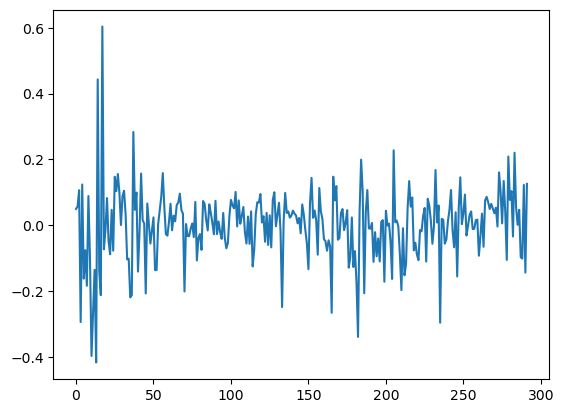

In [24]:
plt.plot(N_CF.reshape(-1))

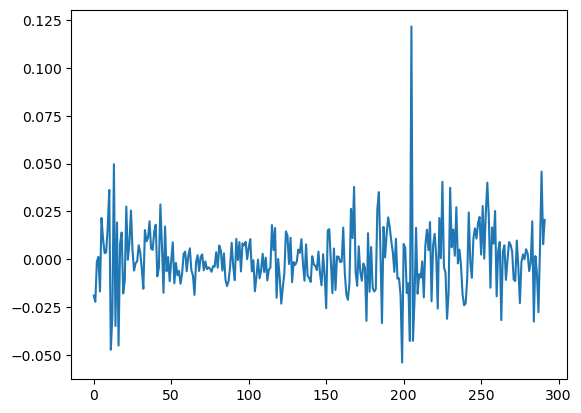

In [25]:
plt.plot(N_DR.reshape(-1))